In [0]:
# clean the data and plot it in a scatter plot
# rules, if the record is IT then add 200 to the salary, just because
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('survey_results_filtered.csv')


In [0]:
#show the statistical data on the dataset
df1.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,3314.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.894000e+03,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,3042.985214,6.563422,6.591656,6.000843,4.072482,3.756005,4.301728,5.730299,4.197219,7.663717,6.122630,1.776048,6.174665,4.421963,7.400346,7.053178,5.656291,6.939905,5.749243,7.968872,6.945958,5.913532,3.025459,1.556542,4.043813,2.886915,3.487271,3.671464,4.233417,3.916771,2.959324,3.280976,5.056320,4.881727,9.534547e+04,2.675385,3.789818,3.338627,3.803830,4.416161,5.154134,4.822046
std,3053.593231,2.760211,2.561167,2.680420,2.567761,2.415322,2.437928,2.858775,2.479231,2.351639,2.652699,1.722283,3.050004,2.852044,2.839361,2.638586,2.846244,2.767258,2.764906,2.761243,2.683269,2.665354,1.301636,0.924537,1.212777,1.156939,1.105238,2.073556,1.848341,2.078595,1.632934,1.897967,1.824644,1.648636,2.033936e+05,1.840027,1.865002,1.677712,1.823728,1.934705,1.840502,1.849375
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1167.500000,5.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.497200e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,2329.500000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,6.000000,9.000000,7.000000,6.000000,3.000000,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.503400e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,3524.750000,9.000000,9.000000,8.000000,6.000000,5.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.000000,6.000000,9.000000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,6.000000
max,14275.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [0]:
#get only the columns that you only need
columns = ['Respondent','YearsCodingProf','SalaryType','ConvertedSalary']
df1 = df[columns]
#display the first  records
df1.head(10)

,Respondent,YearsCodingProf,SalaryType,ConvertedSalary
0,1,3-5 years,Monthly,NaN
1,3,18-20 years,Yearly,70841.0
2,4,6-8 years,NaN,NaN
3,5,12-14 years,NaN,NaN
4,7,0-2 years,Yearly,21426.0
5,8,3-5 years,NaN,41671.0
6,9,0-2 years,Yearly,120000.0
7,10,3-5 years,NaN,NaN
8,11,21-23 years,Yearly,250000.0
9,16,NaN,NaN,NaN


In [0]:
#trying to remove all empty or NaN
df1 = df1.dropna(how='any')
df1.head()

,Respondent,YearsCodingProf,SalaryType,ConvertedSalary
1,3,18-20 years,Yearly,70841.0
4,7,0-2 years,Yearly,21426.0
6,9,0-2 years,Yearly,120000.0
8,11,21-23 years,Yearly,250000.0
14,21,0-2 years,Monthly,0.0


In [0]:
#1. clean and transform the dataset to get the mean years of exp (e.g. 1-3 years == 2)
# and the monthly salary converted into peso.
# def convertToMonthly(x):
#   if (x['SalaryType'] == 'Yearly'):
#     return (int(x['ConvertedSalary']) /12 )
#   if (x['SalaryType'] == 'Weekly'):
#     return (int(x['ConvertedSalary']) *4 )  #salary type was converted into monthly
#   else:
#     return x['ConvertedSalary']
    
df1['Salary(PHP)'] = (df1['ConvertedSalary']*51) #us dollars to ph peso
df1.drop(['ConvertedSalary'], axis = 1, inplace = True)
df1.head(10)


,Respondent,YearsCodingProf,SalaryType,Salary(PHP)
1,3,18-20 years,Yearly,3612891.0
4,7,0-2 years,Yearly,1092726.0
6,9,0-2 years,Yearly,6120000.0
8,11,21-23 years,Yearly,12750000.0
14,21,0-2 years,Monthly,0.0
17,27,0-2 years,Monthly,2443104.0
20,33,12-14 years,Yearly,4894368.0
22,37,6-8 years,Monthly,21420.0
23,38,18-20 years,Yearly,3825000.0
24,39,3-5 years,Yearly,558858.0


In [0]:
# show all the unique values in a column
df1['YearsCodingProf'].unique()

array(['18-20 years', '0-2 years', '21-23 years', '12-14 years',
       '6-8 years', '3-5 years', '9-11 years', '24-26 years',
       '15-17 years', '30 or more years', '27-29 years'], dtype=object)

In [0]:
glob = df1['YearsCodingProf']
Years = []

for i in glob:
  year = str(i).split('-')

  if (str(year[0]) == '30 or more years'):
    ave = int(year[0].split(' ')[0])
  else:
    ave = int((int(year[0]) + int(year[1].split(' ')[0])) /2)

  Years.append(ave)

In [0]:
df1['Years(Ave.)'] = Years
df1.head(10)

,Respondent,YearsCodingProf,SalaryType,Salary(PHP),Years(Ave.)
1,3,18-20 years,Yearly,3612891.0,19
4,7,0-2 years,Yearly,1092726.0,1
6,9,0-2 years,Yearly,6120000.0,1
8,11,21-23 years,Yearly,12750000.0,22
14,21,0-2 years,Monthly,0.0,1
17,27,0-2 years,Monthly,2443104.0,1
20,33,12-14 years,Yearly,4894368.0,13
22,37,6-8 years,Monthly,21420.0,7
23,38,18-20 years,Yearly,3825000.0,19
24,39,3-5 years,Yearly,558858.0,4


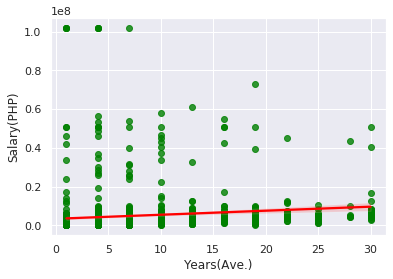

In [0]:
#2. run the set into a linear regression model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set(color_codes=True, style='darkgrid')

ax = sns.regplot(x=df1['Years(Ave.)'], y=df1['Salary(PHP)'], scatter_kws={'color': 'green'}, line_kws={'color':'red'})

In [0]:
#aggregate() function: 
aggregation_functions = {'Years(Ave.)': 'first', 'Salary(PHP)' : 'first' }#'SalaryType': 'first'}
df2 = df1.groupby(df1['Years(Ave.)']).aggregate(aggregation_functions)
df2

,Years(Ave.),Salary(PHP)
Years(Ave.),,
1,1,1092726.0
4,4,558858.0
7,7,21420.0
10,10,2621808.0
13,13,4894368.0
16,16,6120000.0
19,19,3612891.0
22,22,12750000.0
25,25,1082628.0


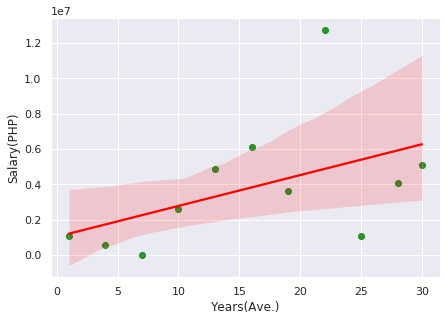

In [0]:

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.9,0.9])
#axes.scatter(df2['Years(Ave.)'], df2['Salary(PHP)'])
axes = sns.regplot(x=df2['Years(Ave.)'], y=df2['Salary(PHP)'], scatter_kws={'color': 'green'}, line_kws={'color':'red'})

In [0]:
#aggregate() function: 
aggregation_functions = {'Years(Ave.)': 'first', 'Salary(PHP)' : 'first' }#'SalaryType': 'first'}
df2 = df1.groupby(df1['Years(Ave.)']).mean()
df2 = df2.reset_index()
df2

,Years(Ave.),Respondent,Salary(PHP)
0,1,2228.983562,3.568459e+06
1,4,2245.976496,4.341645e+06
2,7,2350.140969,4.804746e+06
3,10,2378.180645,5.799108e+06
4,13,2141.435897,5.145367e+06
5,16,2286.873016,7.771560e+06
6,19,2425.388889,7.550372e+06
7,22,1707.708333,7.774740e+06
8,25,2062.076923,4.800249e+06
9,28,2566.666667,1.199460e+07


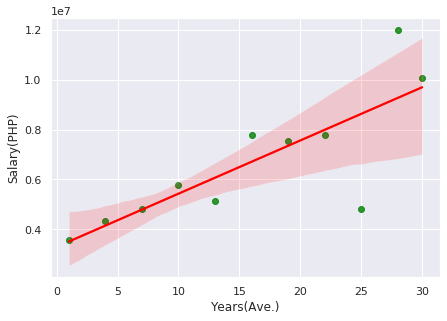

In [0]:

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.9,0.9])
#axes.scatter(df2['Years(Ave.)'], df2['Salary(PHP)'])
axes = sns.regplot(x=df2['Years(Ave.)'], y=df2['Salary(PHP)'], scatter_kws={'color': 'green'}, line_kws={'color':'red'})

3. Analyze the results and figure out why the graph looks that way

The linear regression model shows that the people who's had longer coding experience have an increasing salary.
But most of the people that get payed higher are those 